In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [4]:
stock = pd.read_csv("C:/Users/insun/Desktop/AI_STUDY/2주차(07.10~07.17)/dow_jones_index.data")


df = pd.DataFrame(stock)

# "$" 문자열 삭제 후 숫자로 변환
df['open'] = df['open'].str.replace('$', '').astype(float)
df['high'] = df['high'].str.replace('$', '').astype(float)
df['low'] = df['low'].str.replace('$', '').astype(float)
df['close'] = df['close'].str.replace('$', '').astype(float)

print(df)




     quarter stock       date   open   high    low  close     volume  \
0          1    AA   1/7/2011  15.82  16.72  15.78  16.42  239655616   
1          1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761   
..       ...   ...        ...    ...    ...    ...    ...        ...   
745        2   XOM  5/27/2011  80.22  82.63  80.07  82.63   68230855   
746        2   XOM   6/3/2011  83.28  83.75  80.18  81.18   78616295   
747        2   XOM  6/10/2011  80.93  81.87  79.72  79.78   92380844   
748        2   XOM  6/17/2011  80.00  80.82  78.33  79.02  100521400   
749        2   XOM  6/24/2011  78.65  81.12  76.78  76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79267                                 NaN   
1    

In [5]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [6]:
df = df[['quarter','stock','date','open','high','low','close','volume']]

In [7]:
df

,quarter,stock,date,open,high,low,close,volume
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761
...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400


In [8]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [9]:
dfx = df[['open','high','low','close','volume']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]
dfx = dfx[['open','high','low','volume']]
dfx

,open,high,low,volume
0,0.032380,0.035547,0.034176,0.159267
1,0.037890,0.035486,0.033287,0.161558
2,0.034671,0.033456,0.033033,0.089151
3,0.032689,0.034994,0.034430,0.098122
4,0.034609,0.039668,0.036717,0.100206
...,...,...,...,...
745,0.431092,0.440898,0.442574,0.040529
746,0.450037,0.447786,0.443273,0.047722
747,0.435488,0.436224,0.440351,0.057256
748,0.429730,0.429766,0.431521,0.062895


In [10]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [11]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.46656760743773673, 0.462546125176786, 0.45724812574180657, 0.04941214603619466], [0.44898464558631457, 0.46383763809112083, 0.45762927172047435, 0.02331467455095933], [0.468672609912907, 0.47392373894592643, 0.479545165493873, 0.04978668131963015], [0.4798786525013133, 0.47472324694051465, 0.4522297036893472, 0.0720964039318134], [0.44836552721126455, 0.4478474781993559, 0.43844492412752833, 0.06231074045512771], [0.4310921245473674, 0.44059040563309326, 0.4395883620635317, 0.053362134148430745], [0.4310921245473674, 0.4408979087079349, 0.4425740055630961, 0.04052864308319642], [0.4500371468238997, 0.44778597758438754, 0.4432727731906539, 0.047722171970396236], [0.43548786501022296, 0.4362238619703421, 0.4403506540208673, 0.05725625823450998], [0.4297300641222572, 0.42976629739866773, 0.4315207721817299, 0.06289485657448092]] -> [0.41396976108086364]


In [12]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 740 740


In [13]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (518, 10, 4) (518, 1)
테스트 데이터의 크기 : (222, 10, 4) (222, 1)


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

In [15]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(SimpleRNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\insun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,841 (11.10 KB)

 Trainable params: 2,841 (11.10 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1582
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273
Epoch 7/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243
Epoch 8/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243
Epoch 9/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236
Epoch 10/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204
Epoch 11/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221
Epoch 12/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158
Epoch 13/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164
Epoch 14/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172
Epoch 15/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167
Epoch 16/70
18/18 ━

In [17]:
model.evaluate(test_X, test_y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079


0.005219308193773031

In [18]:
y_pred = model.predict(test_X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [19]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.005219308670050293


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


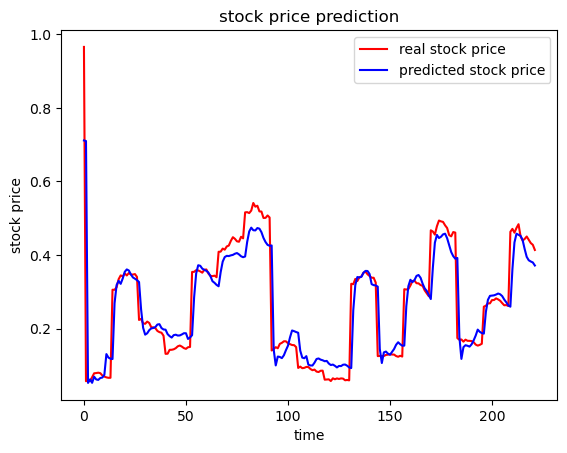

In [20]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

## split.sequence으로 순환데이터 만들기¶


In [21]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 예제 사용법:
# 'data'는 순차적인 데이터로, 리스트나 numpy 배열 형태로 가정합니다.
data = df

# 원하는 시퀀스 길이를 지정합니다.
seq_length = 3

# 시퀀스 생성
sequences = create_sequences(data, seq_length)

print("원본 데이터:")
print(data)
print("\n길이가", seq_length, "인 시퀀스:")
print(sequences)

원본 데이터:
     quarter stock       date   open   high    low  close     volume
0          1    AA   1/7/2011  15.82  16.72  15.78  16.42  239655616
1          1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398
2          1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495
3          1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173
4          1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761
..       ...   ...        ...    ...    ...    ...    ...        ...
745        2   XOM  5/27/2011  80.22  82.63  80.07  82.63   68230855
746        2   XOM   6/3/2011  83.28  83.75  80.18  81.18   78616295
747        2   XOM  6/10/2011  80.93  81.87  79.72  79.78   92380844
748        2   XOM  6/17/2011  80.00  80.82  78.33  79.02  100521400
749        2   XOM  6/24/2011  78.65  81.12  76.78  76.78  118679791

[750 rows x 8 columns]

길이가 3 인 시퀀스:
[[[1 'AA' '1/7/2011' ... 15.78 16.42 239655616]
  [1 'AA' '1/14/2011' ... 15.64 15.97 242963398]
  [1 'AA' '1/21/2011' ... 15.